In [219]:
# 수요량, 생산량
# http://www.keaj.kr/news/articleView.html?idxno=5324

In [220]:
import pandas as pd

df=pd.read_csv("./data/01_시간별 전력수요량.csv", encoding="UTF-8" )
df

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,52695,55879,60282,64447,66465,66199,66018,65477,65404,65676
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,78573,81324,84900,85269,83170,80813,78270,75816,75484,75299
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,80206,82581,86163,86690,84888,82717,79738,77372,77160,76931
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,80727,82873,85342,85151,83548,81754,79119,76907,76504,76197
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,82741,83862,85562,85427,83751,81791,78870,76334,75929,75685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,67443,64907,63407,62728,62978,64623,68371,74953,82260,...,74509,76839,79134,79587,77660,76382,74112,71759,71191,70404
361,2023-12-28,66678,64274,62744,62071,62440,63986,67723,73948,81147,...,74952,76768,78403,78716,77071,75549,73108,70693,70513,69960
362,2023-12-29,66283,63741,62155,61386,61802,63295,66721,72314,78244,...,70781,72101,72856,73271,72243,71253,69738,67790,68001,67552
363,2023-12-30,64267,61503,59987,59103,59104,59593,60870,62188,63275,...,64228,64685,64971,66025,65888,64934,63817,62436,63010,62981


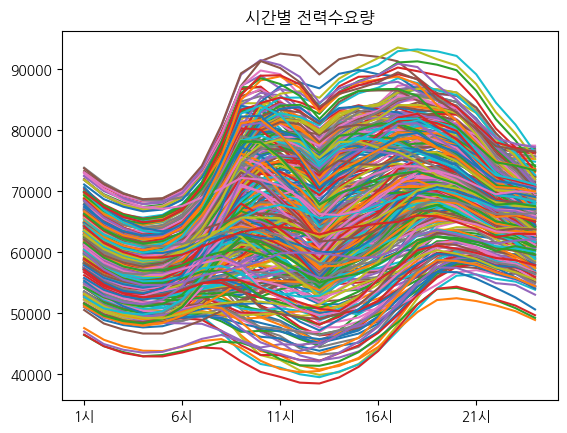

In [221]:
import koreanize_matplotlib

df.set_index("날짜").T.plot()
# 제목 설정
import matplotlib.pyplot as plt
plt.title("시간별 전력수요량")
# 범례 없애기
plt.legend().remove()

In [222]:
df.max()

날짜     2023-12-31
1시          73869
2시          71423
3시          69702
4시          68695
5시          68869
6시          70429
7시          74159
8시          80849
9시          89366
10시         91556
11시         92613
12시         92260
13시         89181
14시         91678
15시         92426
16시         92070
17시         93615
18시         93299
19시         92986
20시         92218
21시         89205
22시         84565
23시         80941
24시         77490
dtype: object

In [223]:
df.min()

날짜     2023-01-01
1시          46380
2시          44549
3시          43439
4시          42869
5시          42865
6시          43511
7시          44349
8시          44157
9시          42074
10시         40320
11시         39505
12시         38559
13시         38422
14시         39413
15시         41153
16시         43765
17시         47077
18시         50148
19시         52127
20시         52425
21시         51962
22시         51248
23시         50295
24시         48850
dtype: object

Text(0.5, 1.0, '시간별 전력수요량')

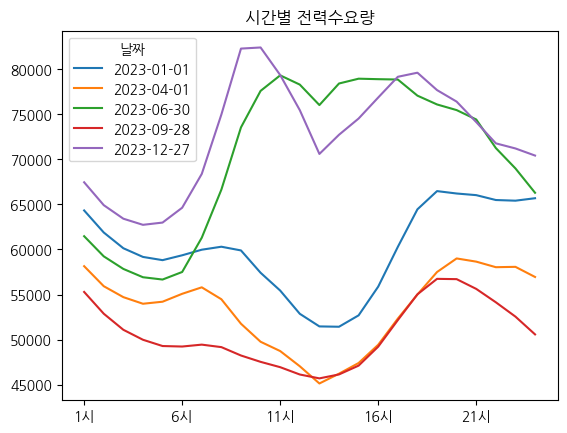

In [224]:
# 30일치 데이터만 선택
df=pd.read_csv("./data/01_시간별 전력수요량.csv", encoding="UTF-8" )
df=df.iloc[::90]
df.set_index("날짜").T.plot()
plt.title("시간별 전력수요량")

In [225]:
df=pd.read_csv("./data/01_시간별 전력수요량.csv", encoding="UTF-8" )
df["1시"]

0      64322
1      63083
2      71842
3      73087
4      72474
       ...  
360    67443
361    66678
362    66283
363    64267
364    59893
Name: 1시, Length: 365, dtype: int64

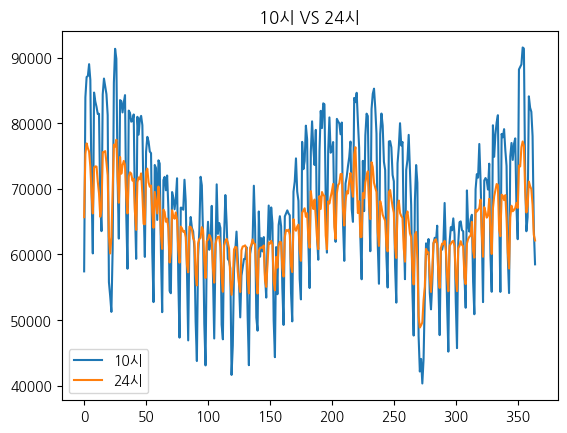

In [226]:
plt.plot(df["10시"].values, label="10시")
plt.plot(df["24시"].values, label="24시")
plt.legend()
plt.title("10시 VS 24시")
plt.show()

In [238]:
# 딥러닝으로 예측하기
df = pd.read_csv("./data/01_시간별 전력수요량.csv", encoding="UTF-8" )
df
# sum 합 열 생성
df["sum"] = df.sum( axis = 1, numeric_only=True)
df

,날짜,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,sum
0,2023-01-01,64322,61879,60133,59170,58813,59352,59971,60301,59890,...,55879,60282,64447,66465,66199,66018,65477,65404,65676,1441001
1,2023-01-02,63083,60897,59751,59360,60127,62341,66729,74246,83138,...,81324,84900,85269,83170,80813,78270,75816,75484,75299,1783897
2,2023-01-03,71842,69513,68141,67409,67797,69567,73423,79563,87110,...,82581,86163,86690,84888,82717,79738,77372,77160,76931,1875172
3,2023-01-04,73087,70684,69165,68327,68569,70168,73743,79699,86766,...,82873,85342,85151,83548,81754,79119,76907,76504,76197,1875907
4,2023-01-05,72474,70042,68646,67878,68126,69726,73520,79108,87276,...,83862,85562,85427,83751,81791,78870,76334,75929,75685,1886010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,67443,64907,63407,62728,62978,64623,68371,74953,82260,...,76839,79134,79587,77660,76382,74112,71759,71191,70404,1743689
361,2023-12-28,66678,64274,62744,62071,62440,63986,67723,73948,81147,...,76768,78403,78716,77071,75549,73108,70693,70513,69960,1732156
362,2023-12-29,66283,63741,62155,61386,61802,63295,66721,72314,78244,...,72101,72856,73271,72243,71253,69738,67790,68001,67552,1664443
363,2023-12-30,64267,61503,59987,59103,59104,59593,60870,62188,63275,...,64685,64971,66025,65888,64934,63817,62436,63010,62981,1511358


In [239]:
# 데이터 전처리 : Min-Max 정규화 하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
df_scaled = scaler.fit_transform(df[scale_cols])
df = pd.DataFrame(df_scaled, columns=scale_cols)

In [229]:
# Define the new column names as a dictionary
new_column_names = {"날짜": "Date", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "10", 11: "11", 12: "12", 13: "13", 14: "14", 15: "15", 16: "16", 17: "17", 18: "18", 19: "19", 20: "20", 21: "21", 22: "22", 23: "23", 24: "24"}

# 열 이름 변경 
df.rename(columns=new_column_names, inplace=True)

In [230]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# feature은 30일치, target은 다음날 1일치 전력 수요량
# 데이터 클래스 생성
class DemandDataset(Dataset):
    def __init__(self, df):
        self.data = df
        self.x = self.data.iloc[:, -1].values
    def __len__(self):
        return len(self.data)-30
    def __getitem__(self, idx):
        return self.x[idx:idx+30], self.x[idx+30]

In [231]:
dataset = DemandDataset(df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [232]:
for i in dataloader:
    print(i)
    break

[tensor([[0.5852, 0.5972, 0.6851, 0.5214, 0.3916, 0.6344, 0.6988, 0.7317, 0.7639,
         0.7593, 0.5195, 0.4863, 0.7073, 0.7017, 0.6783, 0.7052, 0.5784, 0.4003,
         0.3142, 0.5858, 0.6484, 0.6190, 0.6262, 0.6363, 0.6635, 0.6369, 0.8625,
         0.8577, 0.9600, 0.9907],
        [0.8529, 0.8582, 0.8571, 0.7773, 0.7147, 0.5899, 0.6292, 0.9339, 0.9343,
         0.9393, 0.8785, 0.8111, 0.4861, 0.3943, 0.4792, 0.7359, 0.9739, 0.9633,
         1.0000, 0.8100, 0.6643, 0.9083, 0.8189, 0.8631, 0.8871, 0.8652, 0.6925,
         0.6076, 0.8036, 0.8263],
        [0.7221, 0.6645, 0.6075, 0.7505, 0.6691, 0.4948, 0.4186, 0.6281, 0.6153,
         0.5632, 0.5800, 0.5285, 0.3463, 0.3991, 0.6246, 0.5913, 0.5794, 0.6128,
         0.5722, 0.4131, 0.3452, 0.5373, 0.5280, 0.5097, 0.5146, 0.4808, 0.3327,
         0.2941, 0.5376, 0.5358],
        [0.5146, 0.4808, 0.3327, 0.2941, 0.5376, 0.5358, 0.5224, 0.4755, 0.4602,
         0.2828, 0.2243, 0.4483, 0.4710, 0.4776, 0.5345, 0.5190, 0.3564, 0.2635,
      

In [233]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=30, hidden_size=30, num_layers=2, batch_first=True)
        self.fc = nn.Linear(30, 1)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

def compute_r2_score(y_true, y_pred):
    return r2_score(y_true.detach().cpu().numpy(), y_pred.detach().cpu().numpy())

for epoch in range(20000):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(x.unsqueeze(1).float())
        loss = criterion(output.squeeze(), y.float())
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        y_true = y.float().unsqueeze(1)  
        y_pred = model(x.unsqueeze(1).float())  
        r2 = compute_r2_score(y_true, y_pred.squeeze())

        print(f"Epoch {epoch}: Loss: {loss}, R-squared: {r2}")


Epoch 0: Loss: 0.042676184326410294, R-squared: -0.45815793951315786
Epoch 100: Loss: 0.003200599690899253, R-squared: 0.8712673918968419
Epoch 200: Loss: 0.0036105774343013763, R-squared: 0.8547197756154032
Epoch 300: Loss: 0.004050368908792734, R-squared: 0.8814478861557175
Epoch 400: Loss: 0.002442718483507633, R-squared: 0.9572430258148809
Epoch 500: Loss: 0.0018418547697365284, R-squared: 0.9615406780690715
Epoch 600: Loss: 0.001327970065176487, R-squared: 0.9343554023506591
Epoch 700: Loss: 0.002515925094485283, R-squared: 0.8804469829051998
Epoch 800: Loss: 0.0025169579312205315, R-squared: 0.9372648044372515
Epoch 900: Loss: 0.001941788592375815, R-squared: 0.9128721057771059
Epoch 1000: Loss: 0.0027536714915186167, R-squared: 0.9232345783436999
Epoch 1100: Loss: 0.003436033148318529, R-squared: 0.9403472426210417
Epoch 1200: Loss: 0.001050201361067593, R-squared: 0.9675506772929567
Epoch 1300: Loss: 0.0016232560155913234, R-squared: 0.9519538242142069
Epoch 1400: Loss: 0.00165

In [234]:
# 모델 저장
torch.save(model, "./model/model.pth")

In [235]:
# 모델 예측
model = torch.load("./model/model.pth")
model.eval()

# 예측 데이터 생성
pred = []
for i in range(len(dataset)):
    x, y = dataset[i]
    output = model(torch.tensor(x).unsqueeze(0).unsqueeze(1).float())
    pred.append(output.squeeze().detach().numpy())
    
# 예측 데이터 합치기
pred = np.array(pred).reshape(-1, 1)
pred = np.concatenate([np.zeros((30, 1)), pred])
# 예측 데이터 저장
df["예측"] = pred